In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

`*` IMPORTANT POINT FOR TRAINIG MODEL

1. Read csv file.
2. EDA and feature engineering
3. Devide our dataset into dependent and independent data
4. Further devide the dataset into train and test
5. Standard scaling on the train and test data
6. Model training 

In [2]:
df = pd.read_csv('height-weight.csv')

In [3]:
# is wale dataset me ek dependent feature hai isliye ye simple linear regression hai 

df.head(3)

,Weight,Height
0,45,120
1,58,135
2,48,123


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [5]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [6]:
df.shape

(23, 2)

In [7]:
df.isnull ().sum()

Weight    0
Height    0
dtype: int64

Text(0, 0.5, 'Height')

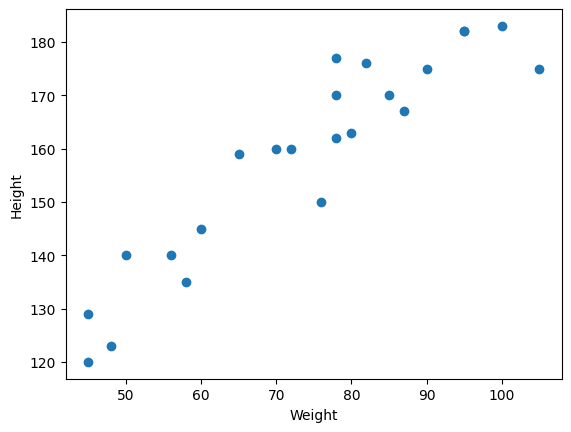

In [8]:
plt.scatter(df['Weight'] ,df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [9]:
# Devide our dataset depended and independent features

X = df[['Weight']] ## independent feature- 
y = df['Height'] ## dependent feature -- column ko one bracket ke ander rakh sakte hain 

In [10]:
X.shape , y.shape

((23, 1), (23,))

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train ,X_test , y_train , y_test = train_test_split(X , y , test_size = 20, random_state = 42)

In [13]:
X_train.shape , X_test.shape 

((3, 1), (20, 1))

In [14]:
y_train.shape , y_test.shape

((3,), (20,))

Note :

* training dataset ke pahle fit fir transform method use karenge  nhi to dono ko sath me bhi jaise fit_transform use karenge 
* and test ke dataset ke liye only transform use karenge

1. fit = fit se poore dataset me mean and z-score ki jo mean and standard daviation method hoti hai
2. transform = poore dataset me apply hoti hai


* Standard scaler ka formula, z = (x - u) / s

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
X_train = scaler.fit_transform(X_train)

In [18]:
X_train

array([[ 0.33968311],
       [ 1.01904933],
       [-1.35873244]])

In [19]:
X_test = scaler.fit_transform(X_test)

In [20]:
X_test

array([[ 0.31272925],
       [ 0.31272925],
       [-1.49780852],
       [ 1.24543053],
       [-0.4005129 ],
       [ 1.79407834],
       [-0.78456637],
       [ 1.51975443],
       [ 0.31272925],
       [-1.33321418],
       [ 1.24543053],
       [-1.49780852],
       [-0.67483681],
       [-0.126189  ],
       [ 0.20299969],
       [-1.22348461],
       [-0.89429593],
       [-0.01645943],
       [ 0.97110662],
       [ 0.53218837]])

In [21]:
X_train.shape , X_test.shape

((3, 1), (20, 1))

In [22]:
# y variable me standard scaler apply nhi hoga kyunki y variable dependent / output feature hai

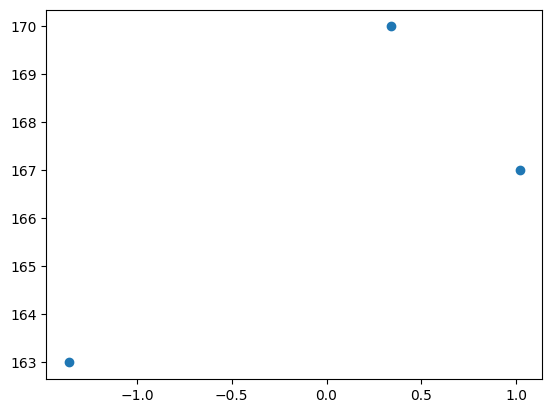

In [23]:
plt.scatter(X_train , y_train)

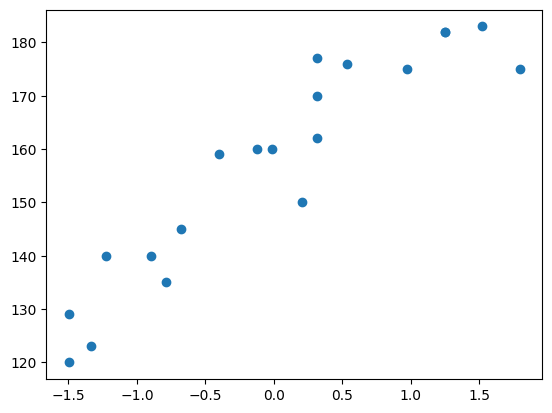

In [24]:
plt.scatter(X_test ,y_test) 

In [25]:
# agr koi new data aata hai to transform method se pahle use transform karenge

scaler.transform([[80]])

# output me yah 80 ko transform kr arrar scaler value show karta hai

C:\Users\Smart\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.42245881]])

In [26]:
# model training

from sklearn.linear_model import LinearRegression

In [27]:
regressor = LinearRegression()

# agr linear regression ke baad bracket blank leave kr denge to ushke ander ke all functions
#(ex.  fit_intercept=True, copy_X=True, n_jobs=None, positive=False)by default run karenge

In [28]:
# trainig the train data

regressor.fit(X_train , y_train)

LinearRegression()

In [29]:
regressor.intercept_

166.66666666666666

In [30]:
regressor.coef_

array([2.15132636])

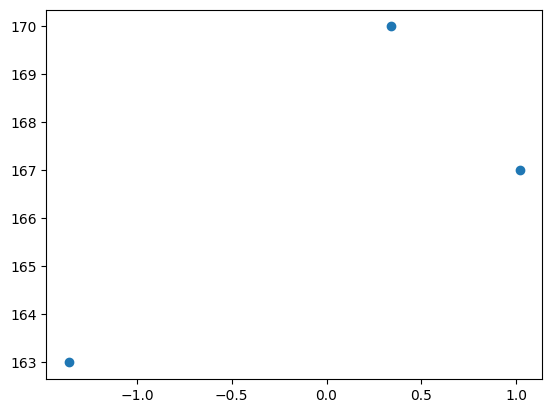

In [31]:
plt.scatter(X_train , y_train)

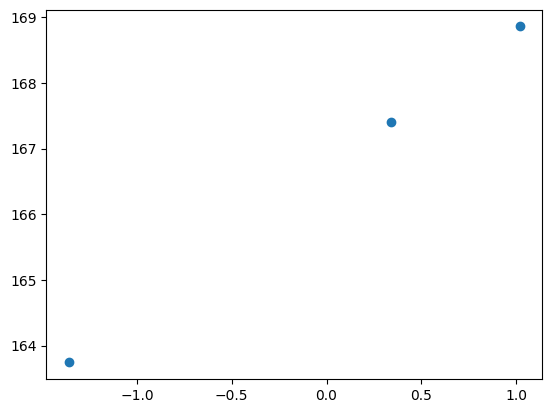

In [32]:
# best fit line by training the data

plt.scatter(X_train , regressor.predict(X_train))

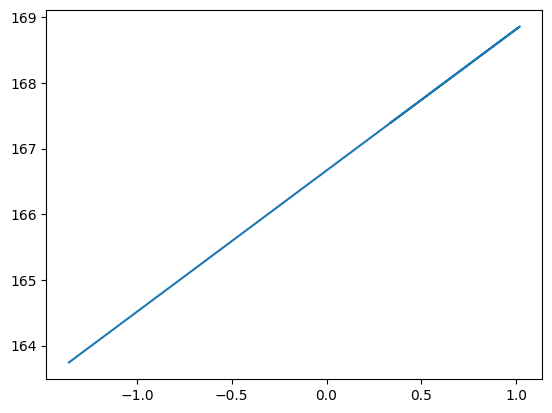

In [33]:
# line me prediction show karne ke liye scatter ke place me plot hoga 

plt.plot(X_train , regressor.predict(X_train))

In [34]:
# predidction for the test data

y_pred_test = regressor.predict(X_test)

In [35]:
y_pred_test

array([167.33944935, 167.33944935, 163.44439171, 169.34599419,
       165.8050327 , 170.52631469, 164.97880836, 169.93615444,
       167.33944935, 163.79848786, 169.34599419, 163.44439171,
       165.21487246, 166.39519295, 167.10338525, 164.03455196,
       164.74274426, 166.63125705, 168.75583395, 167.81157755])

In [36]:
y_test

15    177
9     170
0     120
8     182
17    159
12    175
1     135
13    183
5     162
2     123
11    182
20    129
3     145
4     160
18    150
16    140
21    140
22    160
7     175
10    176
Name: Height, dtype: int64

In [37]:
## model ko predict karne baad accuracy ka pta karne ke liye 
# performance matrix ka use karnege 


## Performance Matrix MSE, MAE , RMSE

In [38]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

# root mean squard error ko np.sqrt kr sakte hain

In [39]:
mse = mean_squared_error(y_test ,y_pred_test)
mae = mean_absolute_error(y_test , y_pred_test)
rmse = np.sqrt(mse)

print (mse)
print (mae)
print (rmse)

# output mse ka jyada hoga because ushme square hota hai error ka

420.2583664829282
16.476589894581526
20.500204059543606


# Accuracy of the model nikalne ke liye R squared and adjusted r squared 
# R square

## Formula :
    
** R^2 = 1 - SSR / SST**

- R^2 = accuracy of the model
- SSR = sum of squares of residuals
- SST = total sum of squares

In [40]:
# accuracy of the model nikalne ke liye

from sklearn.metrics import r2_score

In [41]:
score = r2_score(y_test ,y_pred_test)

In [42]:
score

-0.03581434949055273

# Adjusted R squard ka formula :

***Adjusted R2 = 1 - [(1-R2)*(n-1)/(n-k-1)]**

where:
    
- R2 : The R2 of the model
- n : The number of observation
- k : The number of predictor variables

In [43]:
# display adjusted R2

1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

-0.0933595911289169